# Parses through the taxonomy of the SRA searches.

Warning, the  taxpath pickle for the sra search is rather heavy to read.
Some input files are not included, and can be found on zenodo.

List of these files:

  - ../data/contigs.skesa.size500.clus9780.taxpath.pkl (zenodo)  
  - ../../Bee_euvirDATA/data/namesRED.dmp (NCBI taxonomy / zenodo)  
  - ../../Bee_euvirDATA/data/nodesRED.dmp (NCBI taxonomy / zenodo)  
  - ../../Bee_euvirDATA/data/viralcontigs_skesa_round2.tblx (zenodo)  
  - ../../Bee_euvirDATA/data/nucl_gb.accession2taxid (NCBI taxonomy)  

For reproducability (in the matter of taxDB consistency, download the zenodo data and extract in to the ../../Bee_euvirDATA location.

In [28]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from graph_tool.all import *
import numpy as np
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import rcParams
%matplotlib inline

In [29]:
with open('../../Bee_euvirDATA/data/contigs.skesa.size500.clus9780.taxpath.pkl', 'rb') as f:
    taxlist = pickle.load(f)
virlist = []
for i in taxlist:
    if 10239 in i:
        virlist.append(i)
len(virlist)

8308

In [30]:
#Before naming them, get the 'rank' of each of the tax ids.
nodes = pd.read_csv("../../Bee_euvirDATA/data/nodesRED.dmp",delimiter='\t',encoding='utf-8')
virdic = {}
for i in virlist:
    taxdic = {}
    for j in i:
        if 'Contig' in str(j):
            name = str(j).replace('scaffolds_','')
        elif 'BeeP-25-2013_NODE_2878_length_686' not in str(j) and 'BeeP-25-2013_NODE_7671_length_511' not in str(j) and 'BeeP-35-2013_NODE_6003_length_514' not in str(j) and 'RR029858.Contig_9800_10' not in str(j):
            tax = int(j)
            rank = nodes[nodes['tax'] == tax].iat[0,2]
            taxdic[rank] = tax
    virdic[name] = taxdic

In [31]:
#Change taxID numbers into names
names = pd.read_csv("../../Bee_euvirDATA/data/namesRED.dmp",delimiter='\t',encoding='utf-8')
namedic = {}
for i in virdic:
    name = str(i)
    tempdic = {}
    for j in virdic[i]:
        nam = names[names['tax'] == int(virdic[i][j])].iat[0,1]
        tempdic[j] = nam
    namedic[i] = tempdic

In [32]:
#Wrap in dataframe
namedf = pd.DataFrame(namedic)
namedf = namedf.T
namedf = namedf.fillna('Unclassified')
namedf['family'].unique()

#Save the output, it's used later.
namedf.to_csv("../data/notebooks_out/viral_df_taxonomy_SRA.csv")

In [3]:
#namedf = pd.read_csv('../data/notebooks_out/viral_df_taxonomy_SRA.csv', index_col=0)

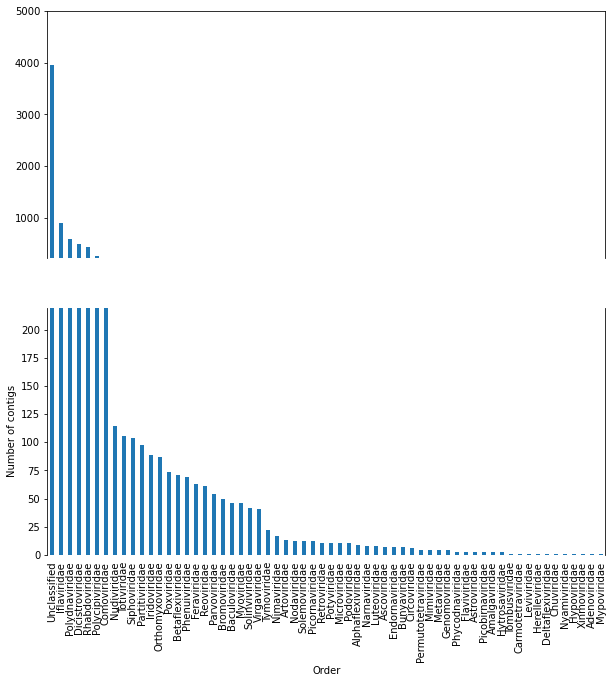

In [33]:
#Time for some plots.

#Order counts:
XX = namedf['family'].value_counts()
g = fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,
                         figsize=(5,5))

g = ax1.spines['bottom'].set_visible(False)
g = ax2.spines['bottom'].set_visible(False)
g = ax2.spines['top'].set_visible(False)
g = ax1.tick_params(axis='x',which='both',bottom=False)
g = ax2.tick_params(axis='x',which='both',bottom=False)


g = ax2.set_ylim(0,220)
g = ax1.set_ylim(220,5000)

g = ax2.set_ylabel("Number of contigs")
g = ax2.set_xlabel("Order")
g = XX.plot(ax=ax1,kind='bar',figsize=(10,10))
g = XX.plot(ax=ax2,kind='bar',figsize=(10,10))
g
g.figure.savefig('../Figures/familycount_SRAdenovo.png', dpi=300)

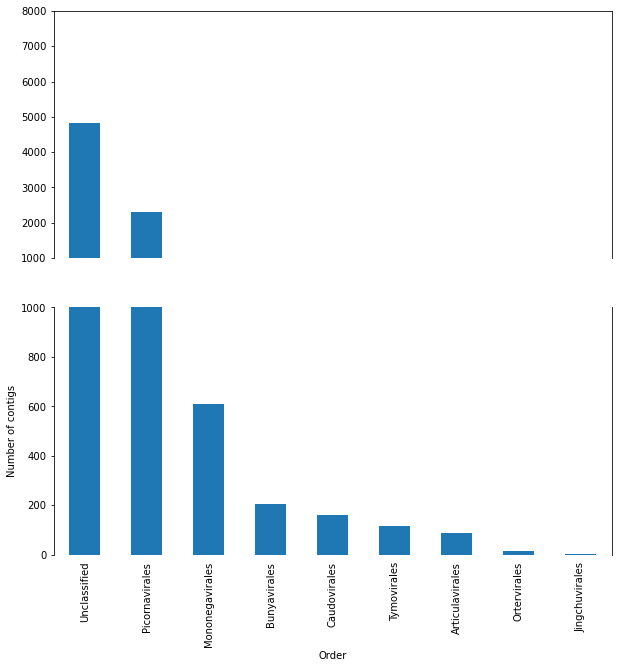

<Figure size 720x720 with 0 Axes>

In [35]:
#Time for some plots.

#Order counts:
XX = namedf['order'].value_counts()
g = fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,
                         figsize=(5,5))

g = ax1.spines['bottom'].set_visible(False)
g = ax2.spines['bottom'].set_visible(False)
g = ax2.spines['top'].set_visible(False)
g = ax1.tick_params(axis='x',which='both',bottom=False)
g = ax2.tick_params(axis='x',which='both',bottom=False)


g = ax2.set_ylim(0,1000)
g = ax1.set_ylim(1000,8000)

g = ax2.set_ylabel("Number of contigs")
g = ax2.set_xlabel("Order")
g = XX.plot(ax=ax1,kind='bar',figsize=(10,10))
g = XX.plot(ax=ax2,kind='bar',figsize=(10,10))

plt.figure(figsize=(10,10))
plt.tight_layout()
g
g.figure.savefig('../Figures/ordercount_SRAdenovo.png', dpi=300)

In [36]:
namedf[namedf['order'] == 'Unclassified'].head()

no rank  \
DRR028884.Contig_11458_13.855_length_2626   unclassified RNA viruses ShiM-2016   
DRR028884.Contig_3125_75.5775_length_1653                                  all   
DRR028884.Contig_5713_5.96173_length_804    unclassified RNA viruses ShiM-2016   
DRR028889.Contig_12350_146.144_length_1081                                 all   
DRR028889.Contig_24090_10029.5_length_6647  unclassified RNA viruses ShiM-2016   

                                           superkingdom        phylum  \
DRR028884.Contig_11458_13.855_length_2626          Vira  Unclassified   
DRR028884.Contig_3125_75.5775_length_1653          Vira  Unclassified   
DRR028884.Contig_5713_5.96173_length_804           Vira  Unclassified   
DRR028889.Contig_12350_146.144_length_1081         Vira  Unclassified   
DRR028889.Contig_24090_10029.5_length_6647         Vira  Unclassified   

                                               subphylum         class  \
DRR028884.Contig_11458_13.855_length_2626   Unclassified  Unclassified   
DRR028884.Contig_3125_75.5775_length_1653   Unclassified  Unclassified   
DRR028884.Contig_5713_5.96173_length_804    Unclassified  Unclassified   
DRR028889.Contig_12350_146.144_length_1081  Unclassified  Unclassified   
DRR028889.Contig_24090_10029.5_length_6647  Unclassified  Unclassified   

                                                   order  \
DRR028884.Contig_11458_13.855_length_2626   Unclassified   
DRR028884.Contig_3125_75.5775_length_1653   Unclassified   
DRR028884.Contig_5713_5.96173_length_804    Unclassified   
DRR028889.Contig_12350_146.144_length_1081  Unclassified   
DRR028889.Contig_24090_10029.5_length_6647  Unclassified   

                                                            species  \
DRR028884.Contig_11458_13.855_length_2626   Wuhan arthropod virus 2   
DRR028884.Contig_3125_75.5775_length_1653     Lymantria xylina MNPV   
DRR028884.Contig_5713_5.96173_length_804    Wuhan arthropod virus 2   
DRR028889.Contig_12350_146.144_length_1081    Lymantria xylina MNPV   
DRR028889.Contig_24090_10029.5_length_6647  Wuhan arthropod virus 2   

                                                   family             genus  \
DRR028884.Contig_11458_13.855_length_2626    Unclassified      Unclassified   
DRR028884.Contig_3125_75.5775_length_1653   Baculoviridae  Alphabaculovirus   
DRR028884.Contig_5713_5.96173_length_804     Unclassified      Unclassified   
DRR028889.Contig_12350_146.144_length_1081  Baculoviridae  Alphabaculovirus   
DRR028889.Contig_24090_10029.5_length_6647   Unclassified      Unclassified   

                                               subfamily  
DRR028884.Contig_11458_13.855_length_2626   Unclassified  
DRR028884.Contig_3125_75.5775_length_1653   Unclassified  
DRR028884.Contig_5713_5.96173_length_804    Unclassified  
DRR028889.Contig_12350_146.144_length_1081  Unclassified  
DRR028889.Contig_24090_10029.5_length_6647  Unclassified

In [37]:
#Put them in a graph:
## Plot viruses in a graph with refseqs.
tblx = []
#Read in tblx output.
with open('../../Bee_euvirDATA/data/viralcontigs_skesa_round2.tblx') as f:
    for line in f:
        if line.strip().split()[0] != line.strip().split()[1] and float(line.strip().split()[10]) < 1e-15:
            tblx.append(line.strip().split())
interactdir = {}
for i in tblx:
    couplestr = str(i[0]) + '|' + str(i[1])
    revcouplestr = str(i[1]) + '|' + str(i[0])
    bit = float(i[11])
    if couplestr in interactdir:
        if interactdir[couplestr] < bit:
            interactdir[couplestr] = bit
    if revcouplestr in interactdir:
        if interactdir[revcouplestr] < bit:
            interactdir[revcouplestr] = bit
    else:
        interactdir[couplestr] = bit
tblx_network = []
for i in interactdir:
    str1 = i.split('|')[0]
    str2 = i.split('|')[1]
    bit = interactdir[i]
    tblx_network.append([str1,str2,bit])

In [38]:
g = Graph(directed=False)
allvert = {}
v_prop = g.new_vertex_property("string")
e_prop = g.new_edge_property("float")
counter = 0
for i in tblx_network:
    if i[0] not in allvert:
        allvert[i[0]] = counter
        counter += 1
        e = g.add_vertex()
        if 'Contig' in i[0]:
            v_prop[e] = 'red'
        else:
            v_prop[e] = 'grey'
    if i[1] not in allvert:
        allvert[i[1]] = counter
        counter += 1
        e = g.add_vertex()
        if 'Contig' in i[1]:
            v_prop[e] = 'red'
        else:
            v_prop[e] = 'grey'
    e = g.add_edge(allvert[i[0]], allvert[i[1]])
    e_prop[e] = i[2]

In [37]:
#Write the graph for viz in cytoscape / gephi.
#Wrap network in df.
#tblxdf = pd.DataFrame(tblx_network)
#tblxdf.to_csv('../data/notebooks_out/skesa_tblx_network.csv',index=False,header=False)

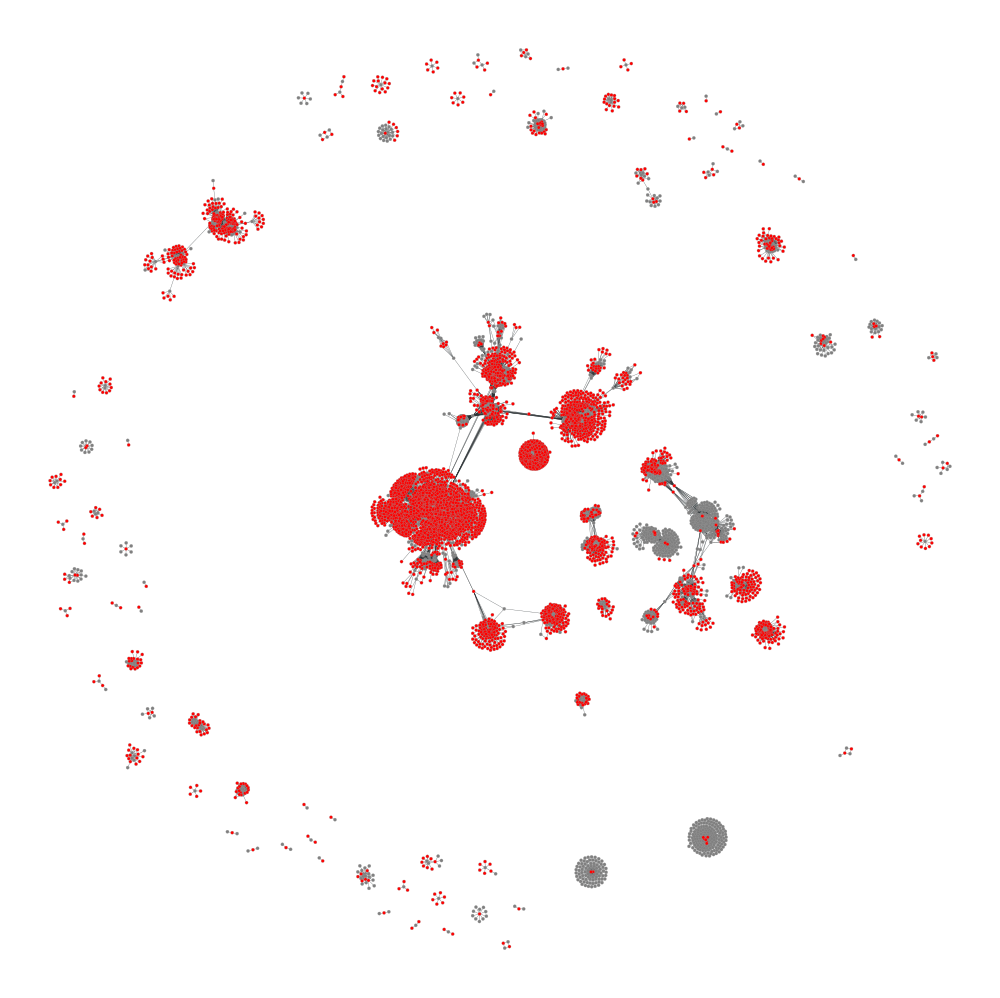

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8bfcf21280, at 0x7f8b9d765790>

In [39]:
graph_draw(g, vertex_fill_color=v_prop ,output_size=(500, 500))

In [40]:
## Grab the taxonomy of the reference sequences.
reflist = []
for i in tblx_network:
    if 'Contig' not in i[0] and i[0].split('.')[0] not in reflist:
        reflist.append(i[0].split('.')[0])
    if 'Contig' not in i[1] and i[1].split('.')[0] not in reflist:
        reflist.append(i[1].split('.')[0])

In [41]:
#Grab the tax ID.
ProgressBar().register()
dask_df = dd.read_csv('../../Bee_euvirDATA/data/nucl_gb.accession2taxid', header=0, sep='\t')
dask_df.npartitions
taxdask = dask_df[dask_df['accession'].isin(reflist)]
taxlist = taxdask.compute()

[########################################] | 100% Completed |  3min 22.0s
[########################################] | 100% Completed |  3min 22.1s
[########################################] | 100% Completed |  3min 22.2s


In [42]:
reftaxlist = []
for i in list(taxlist['accession']):
    taxid = list(taxlist[taxlist['accession'] == i]['taxid'])[0]
    reftaxlist.append([i,taxid])

#Pickle the list (run tax.py on this pickle outside of jupyter).
with open('../data/notebooks_out/SRA_refstaxlist.pkl', 'wb') as f:
    pickle.dump(reftaxlist, f)

In [43]:
#Run the tax.py script on the pickled list to get taxpaths.
#python ../../scripts/tax.py -i SRA_refstaxlist.pkl -t pickle -o SRA_refs_taxpathlist.pkl --nodes ../../../Bee_euvirDATA/data/nodesRED.dmp
with open('../data/notebooks_out/SRA_refs_taxpathlist.pkl', 'rb') as f:
    reftaxpath = pickle.load(f)
#Before naming them, get the 'rank' of each of the tax ids.
nodes = pd.read_csv("../../Bee_euvirDATA/data/nodesRED.dmp",delimiter='\t',encoding='utf-8')
refdic = {}
for i in reftaxpath:
    taxdic = {}
    for j in i:
        if 'NC' in str(j):
            name = str(j)
        else:
            tax = int(j)
            rank = nodes[nodes['tax'] == tax].iat[0,2]
            taxdic[rank] = tax
    refdic[name] = taxdic

In [44]:
#Change taxID numbers into names
names = pd.read_csv("../../Bee_euvirDATA/data/namesRED.dmp",delimiter='\t',encoding='utf-8')
namedic = {}
for i in refdic:
    name = str(i)
    tempdic = {}
    for j in refdic[i]:
        nam = names[names['tax'] == int(refdic[i][j])].iat[0,1]
        tempdic[j] = nam
    namedic[i] = tempdic

In [45]:
refnamedf = pd.DataFrame(namedic)
refnamedf = refnamedf.T
famref = {}
for i in refnamedf.index:
    if refnamedf.loc[i,]['order'] in famref:
        famref[refnamedf.loc[i,]['order']].append(i)
    else:
        famref[refnamedf.loc[i,]['order']] = [i]
famref.keys()

dict_keys(['Mononegavirales', 'Ortervirales', nan, 'Tymovirales', 'Picornavirales', 'Articulavirales', 'Bunyavirales', 'Jingchuvirales', 'Muvirales', 'Herpesvirales'])

In [46]:
#Create coldic:
refcol = {}
counter = 0
for i in famref:
    if i == 'Picornavirales':
        for j in famref[i]:
            refcol[j] = '#1f77b4'
    if i == 'Mononegavirales':
        for j in famref[i]:
            refcol[j] = '#2ca02c'
    if i == 'nan':
        for j in famref[i]:
            refcol[j] = '#7f7f7f'
    if i == 'Tymovirales':
        for j in famref[i]:
            refcol[j] = '#ff7f0e'
    if i == 'Ortervirales':
        for j in famref[i]:
            refcol[j] = '#7f7f7f'
    if i == 'Articulavirales':
        for j in famref[i]:
            refcol[j] = '#9467bd'
    if i == 'Bunyavirales':
        for j in famref[i]:
            refcol[j] = '#e377c2'
    if i == 'Jingchuvirales':
        for j in famref[i]:
            refcol[j] = '#bcbd22'
    if i == 'Herpesvirales':
        for j in famref[i]:
            refcol[j] = '#7f7f7f'
    if i == 'Muvirales':
        for j in famref[i]:
            refcol[j] = 'black'
for i in famref:
    print(str(i) + ' ' + str(len(famref[i])))

Mononegavirales 198
Ortervirales 155
nan 2013
Tymovirales 231
Picornavirales 272
Articulavirales 32
Bunyavirales 100
Jingchuvirales 8
Muvirales 7
Herpesvirales 1


In [47]:
#Recreate network in colors:
g = Graph(directed=False)
allvert = {}
v_prop = g.new_vertex_property("string")
e_prop = g.new_edge_property("float")
counter = 0
for i in tblx_network:
    if i[0] not in allvert:
        allvert[i[0]] = counter
        counter += 1
        e = g.add_vertex()
        if 'Contig' in i[0]:
            v_prop[e] = '#d62728'
        else:
            if i[0].split('.')[0] in refcol:
                v_prop[e] = refcol[i[0].split('.')[0]]
            else:
                v_prop[e] = '#7f7f7f'
    if i[1] not in allvert:
        allvert[i[1]] = counter
        counter += 1
        e = g.add_vertex()
        if 'Contig' in i[1]:
            v_prop[e] = '#d62728'
        else:
            if i[1].split('.')[0] in refcol:
                v_prop[e] = refcol[i[1].split('.')[0]]
            else:
                v_prop[e] = '#7f7f7f'
    e = g.add_edge(allvert[i[0]], allvert[i[1]])
    e_prop[e] = i[2]

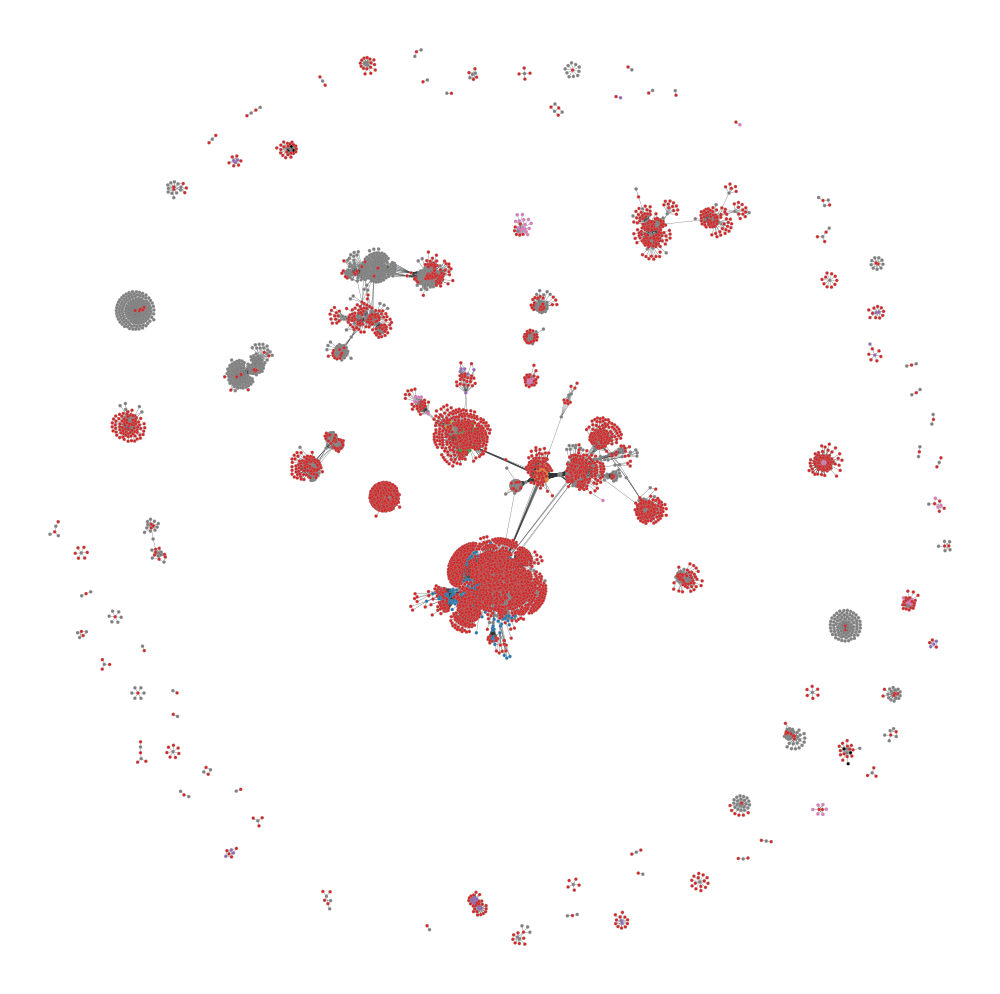

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8bd1233550, at 0x7f8bf2840e50>

In [48]:
#For saving push this up to 10000x10000
graph_draw(g, vertex_fill_color=v_prop ,output_size=(500, 500))

In [49]:
state_dc = minimize_nested_blockmodel_dl(g, deg_corr=False)


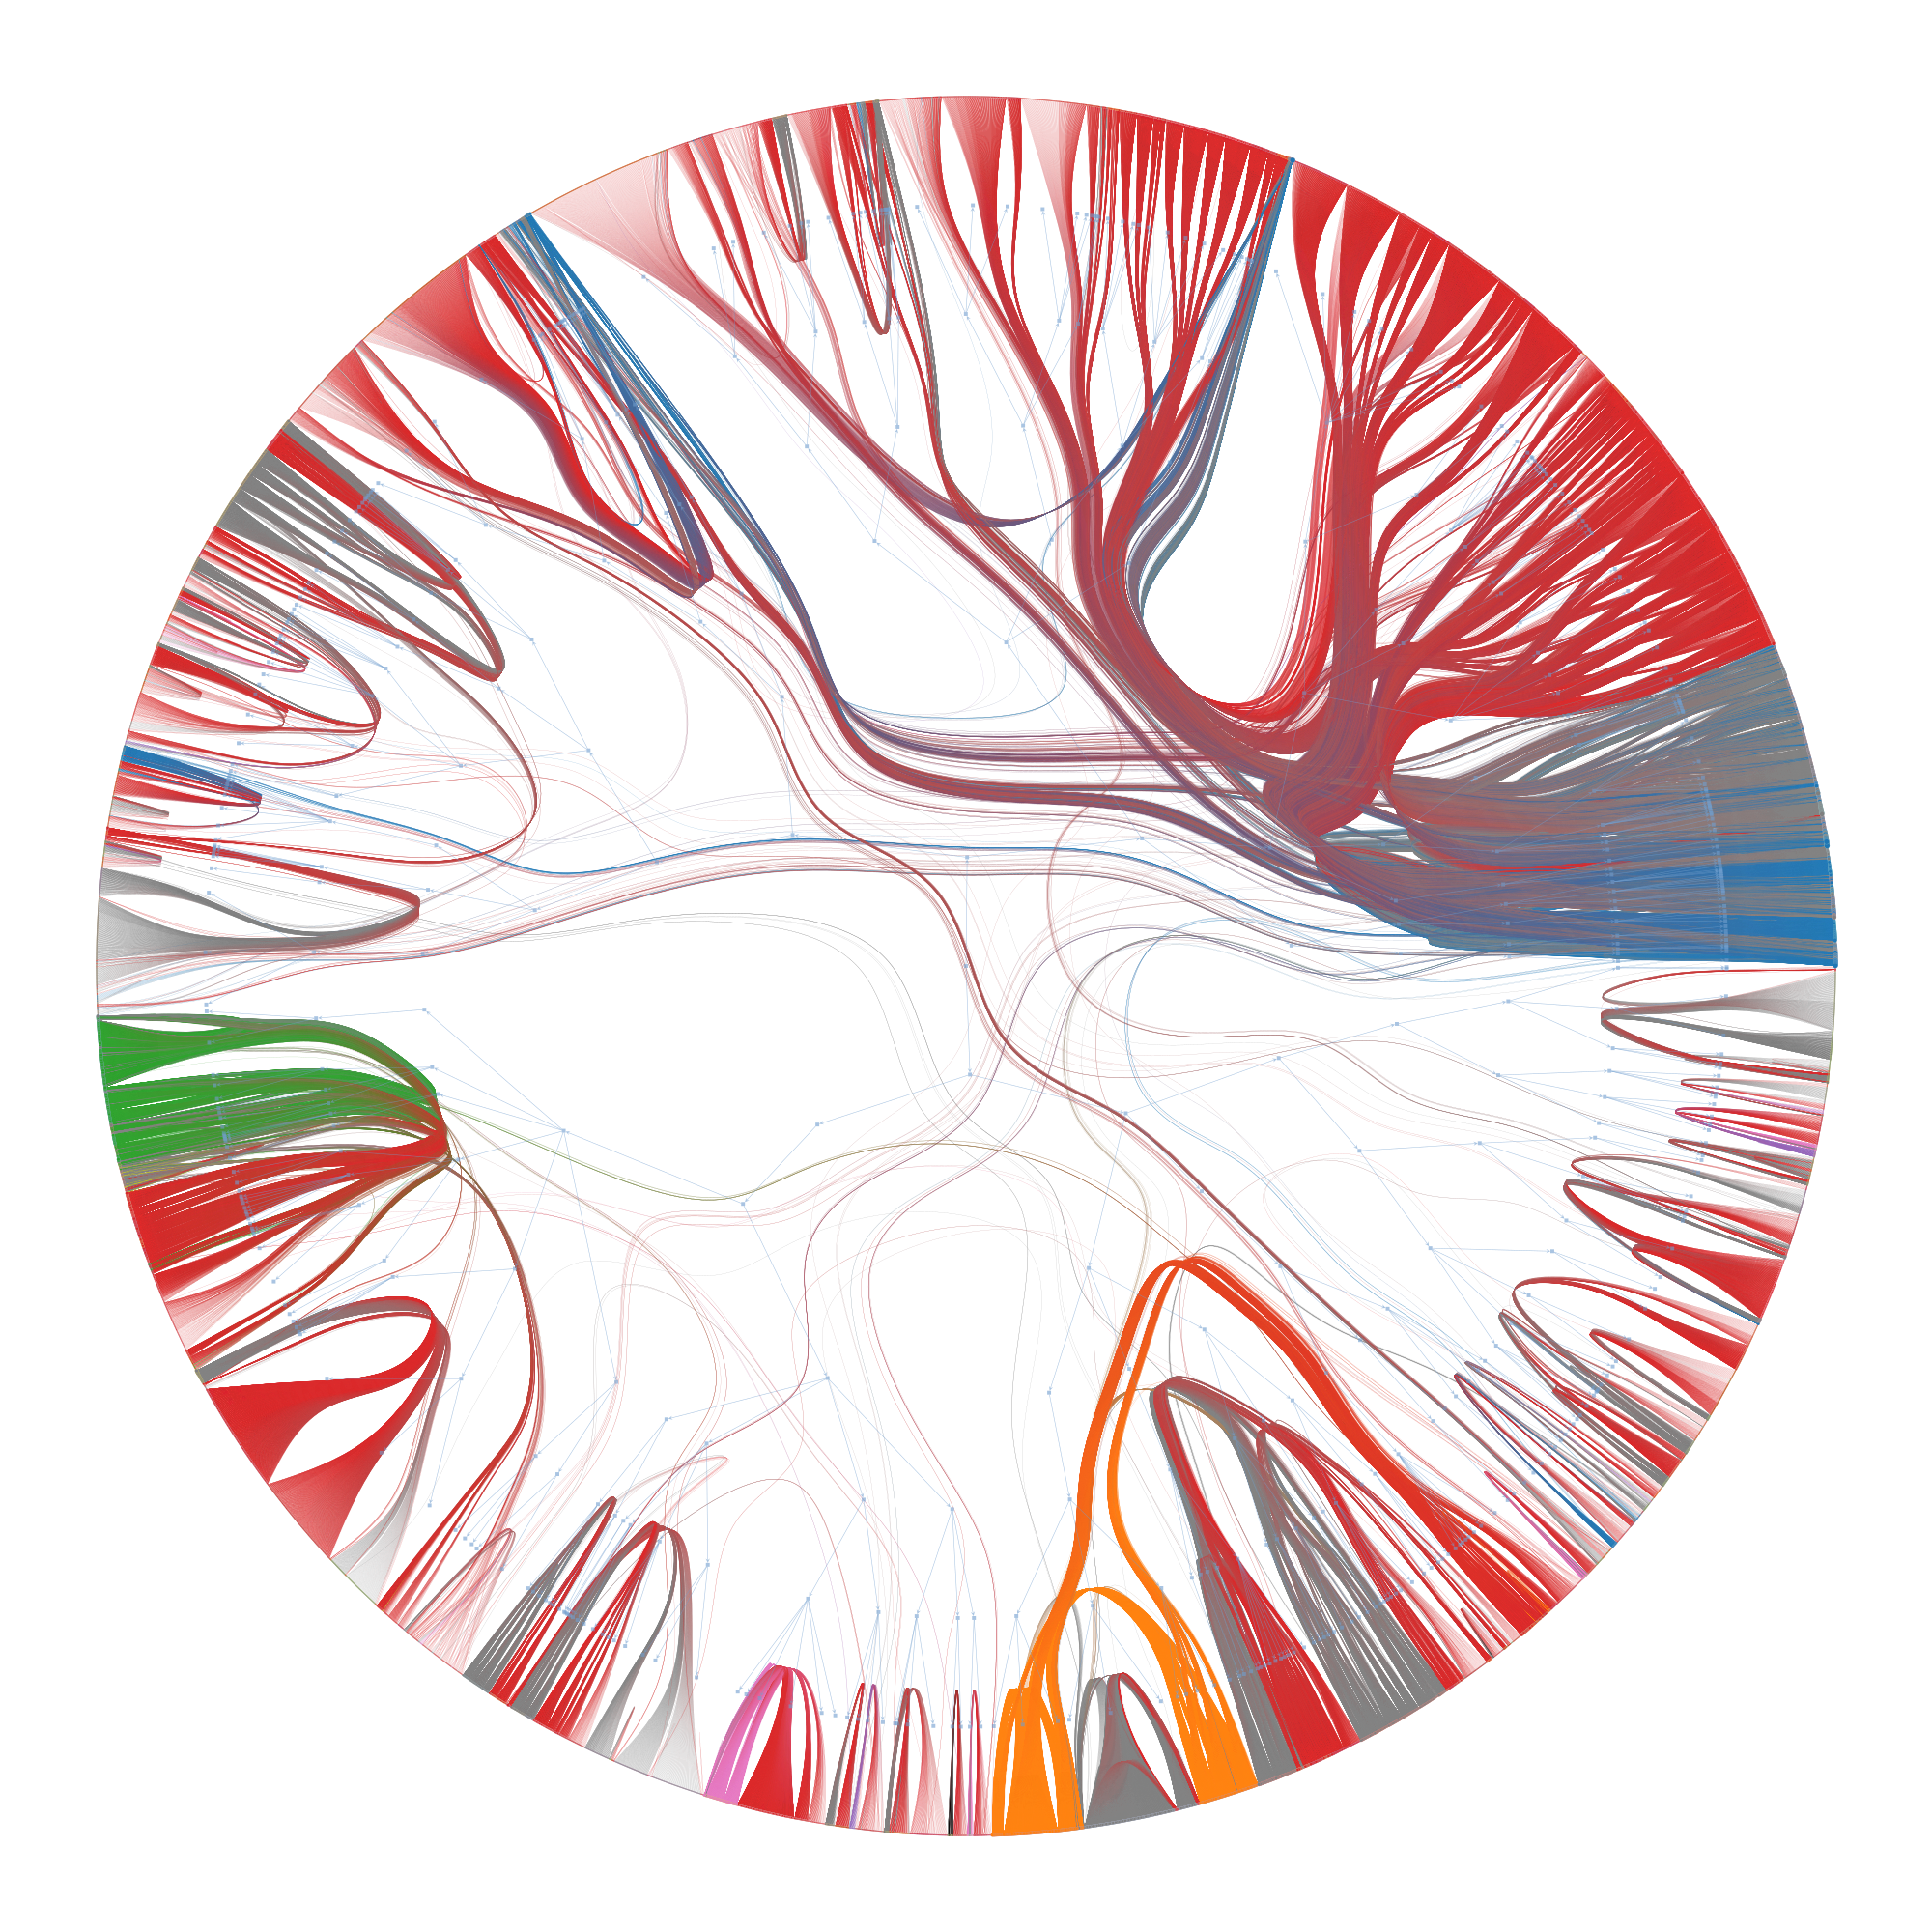

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8bd1233550, at 0x7f8bfa95ec70>,
 <Graph object, directed, with 8615 vertices and 8614 edges, at 0x7f8d43dc2910>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8d43dc2910, at 0x7f8c08e9e9a0>)

In [50]:
draw_hierarchy(state_dc,vertex_fill_color=v_prop,output_size=(1000, 1000))


In [30]:
draw_hierarchy(state_dc,vertex_fill_color=v_prop,output_size=(10000, 10000), output='../Figures/Bee_tblx_graph_SRA_minizenestedblock.png')


In [31]:
#Save with names
draw_hierarchy(state_dc,vertex_fill_color=v_prop,vertex_font_size=50,output_size=(10000, 10000), output='../Figures/Bee_tblx_graph_SRA_minizenestedblock_NAMES.png')
